In [3]:
import networkx as nx
import numpy as np

In [54]:
from tqdm import tqdm

data_path = {4:None, 8:None, 10:None}
data_cluster = {4:None, 8:None, 10:None}
for k in [4,8, 10]:
    paths = []
    clust = []
    for beta in tqdm(np.geomspace(0.0001, 1, num=14)):
        G = nx.watts_strogatz_graph(1000, k, beta)
        paths.append(nx.average_shortest_path_length(G))
        clust.append(nx.average_clustering(G))
    data_path[k] = np.array(paths)
    data_cluster[k] = np.array(clust)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [01:05<00:00,  4.66s/it]


In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

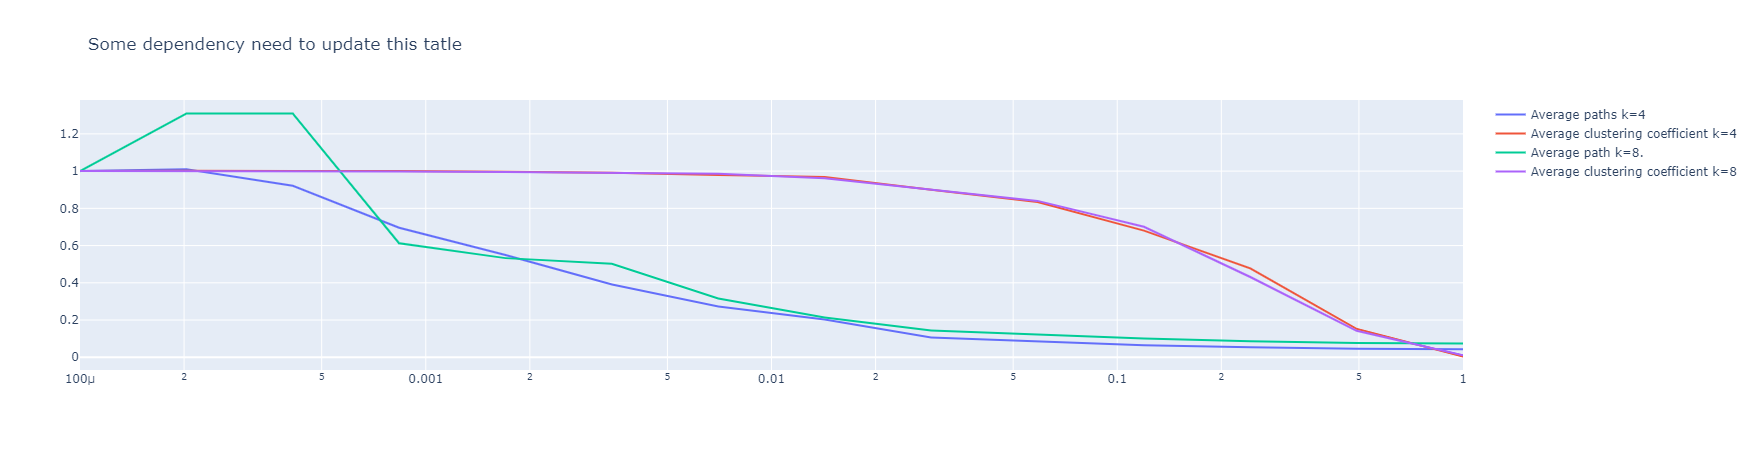

In [55]:

trace1 = go.Scatter(
    x=np.geomspace(0.0001, 1, num=14),
    y=data_path[4]/data_path[4][0],
    mode="lines",
    name="Average paths k=4"
)
trace2 = go.Scatter(
    x=np.geomspace(0.0001, 1, num=14),
    y=data_cluster[4]/data_cluster[4][0],
    mode="lines",
    name="Average clustering coefficient k=4"
)
trace3 = go.Scatter(
    x=np.geomspace(0.0001, 1, num=14),
    y=data_path[8]/data_path[8][0],
    mode="lines",
    name="Average path k=8."
)
trace4 = go.Scatter(
    x=np.geomspace(0.0001, 1, num=14),
    y=data_cluster[8]/data_cluster[8][0],
    mode="lines",
    name="Average clustering coefficient k=8"
)
trace5 = go.Scatter(
    x=np.geomspace(0.0001, 1, num=14),
    y=data_path[10]/data_path[10][0],
    mode="lines",
    name="Average path k=8."
)
trace6 = go.Scatter(
    x=np.geomspace(0.0001, 1, num=14),
    y=data_cluster[10]/data_cluster[10][0],
    mode="lines",
    name="Average clustering coefficient k=8"
)
fig = go.Figure(
    data=[trace1, trace2, trace3, trace4],
    layout=go.Layout(
        title="Some dependency need to update this tatle",
        xaxis_type="log"
    )
)
fig.show()

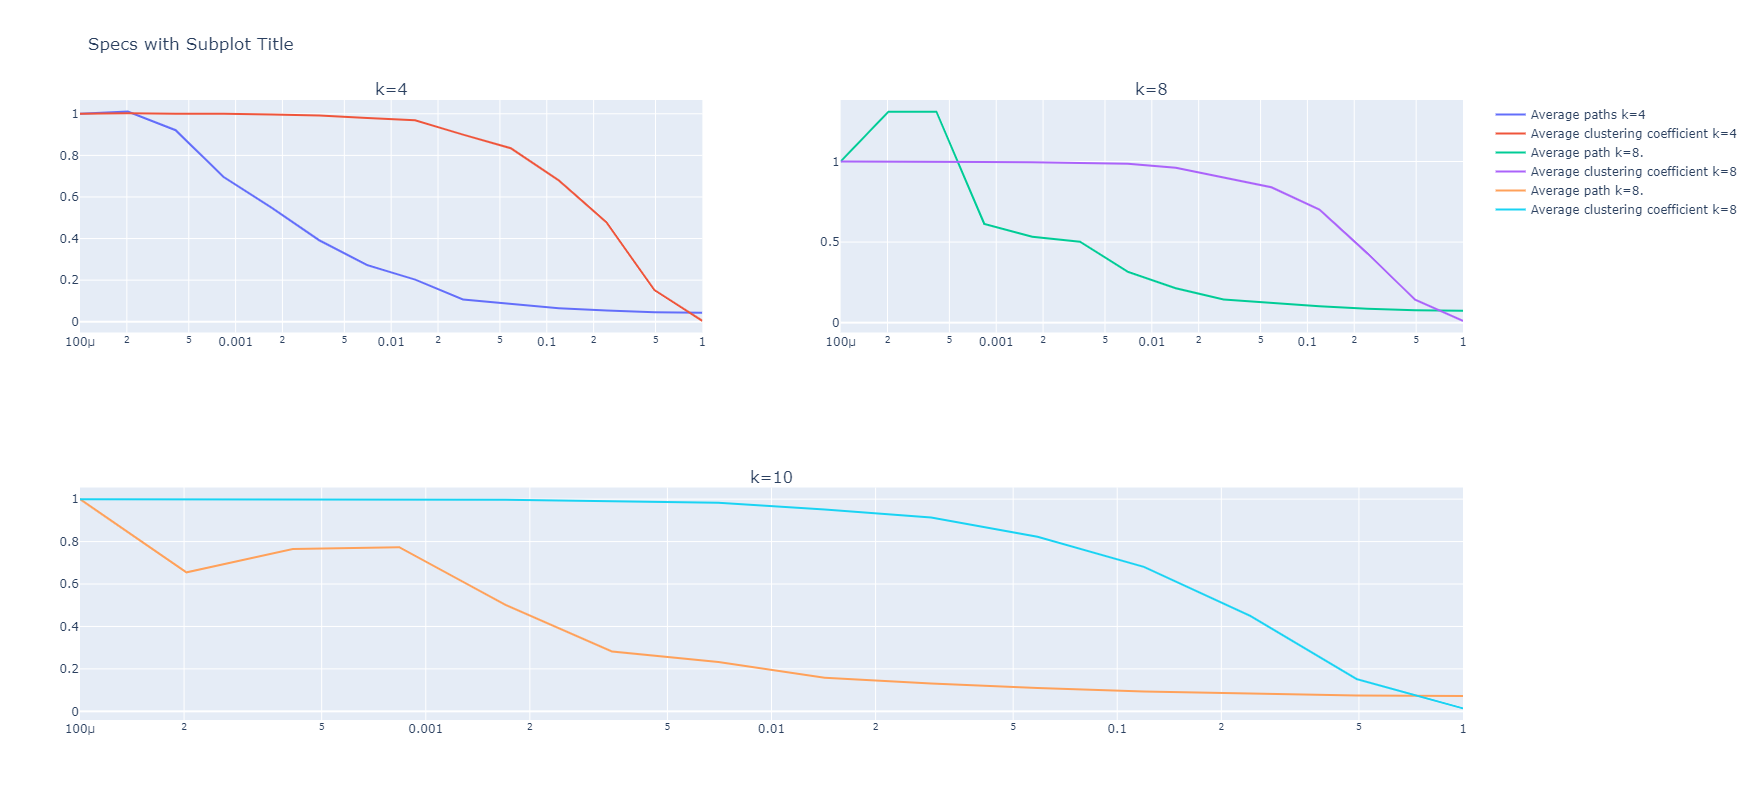

In [58]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("k=4","k=8", "k=10")

)

fig.add_trace(
    trace1,
    row=1, col=1
)
fig.add_trace(
    trace2,
    row=1, col=1
)
fig.add_trace(
    trace3,
    row=1, col=2
)
fig.add_trace(
    trace4,
    row=1, col=2
)
fig.add_trace(
    trace5,
    row=2, col=1
)
fig.add_trace(
    trace6,
    row=2, col=1
)
fig.update_xaxes(type="log")
fig.update_xaxes(type="log")
fig.update_xaxes(type="log")
fig.update_layout(title_text="Specs with Subplot Title", height=800, width=1000)
fig.show()

In [100]:
diameter = []
average_diam = []
rang = list(map(int, np.logspace(1,3)))
for N in tqdm(rang):
    G = nx.watts_strogatz_graph(N, 4, beta)
    d_max = nx.diameter(G)
    d_avg = nx.average_shortest_path_length(G)
    diameter.append(d_max)
    average_diam.append(d_avg)




  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

 36%|█████████████████████████████▏                                                   | 18/50 [00:00<00:00, 167.12it/s]

[10, 10, 12, 13, 14, 15, 17, 19, 21, 23, 25, 28, 30, 33, 37, 40, 44, 49, 54, 59, 65, 71, 79, 86, 95, 104, 115, 126, 138, 152, 167, 184, 202, 222, 244, 268, 294, 323, 355, 390, 429, 471, 517, 568, 625, 686, 754, 828, 910, 1000]




 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 74.54it/s]

 58%|███████████████████████████████████████████████▌                                  | 29/50 [00:00<00:00, 29.95it/s]

 66%|██████████████████████████████████████████████████████                            | 33/50 [00:01<00:01, 12.48it/s]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:02<00:02,  6.00it/s]

 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [00:03<00:03,  3.49it/s]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:05<00:04,  2.25it/s]

 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [00:07<00:05,  1.47it/s]

 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [00:09<00:06,  1.05it/s]

 88%|█████████████████████████

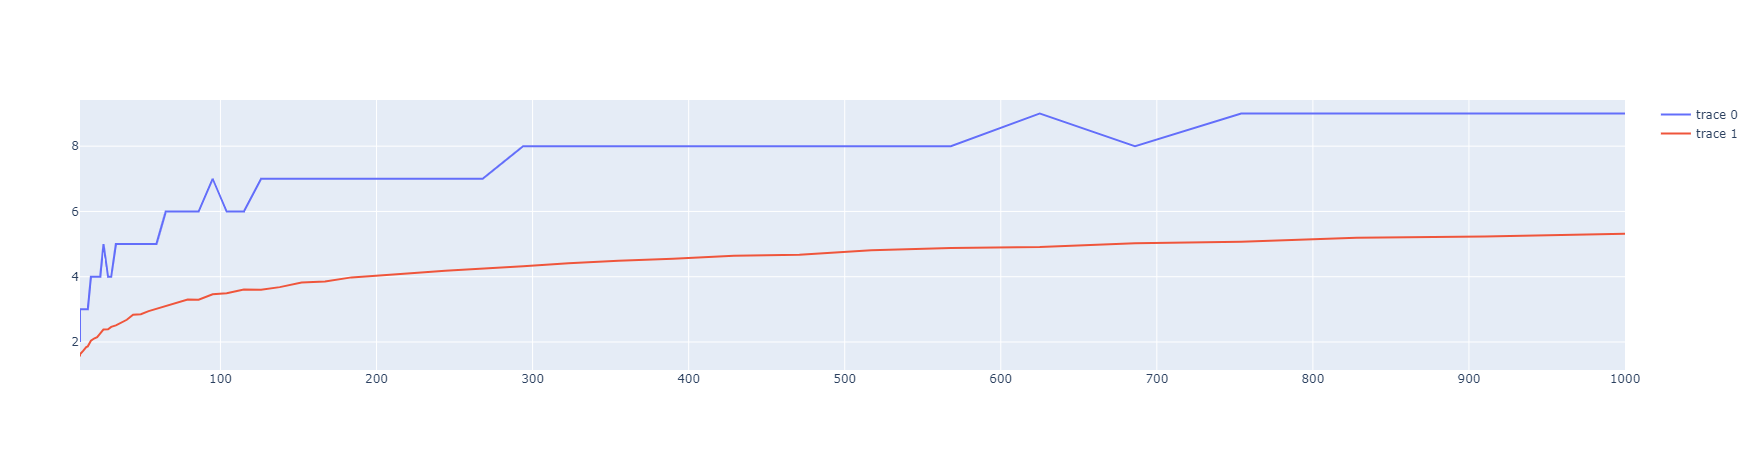

In [102]:
trace1 = go.Scatter(
    x=rang,
    y=diameter
)
trace2 = go.Scatter(
    x=rang,
    y=average_diam
)
fig = go.Figure(
    data=[trace1, trace2]
)
# fig.update_layout()
fig.show()

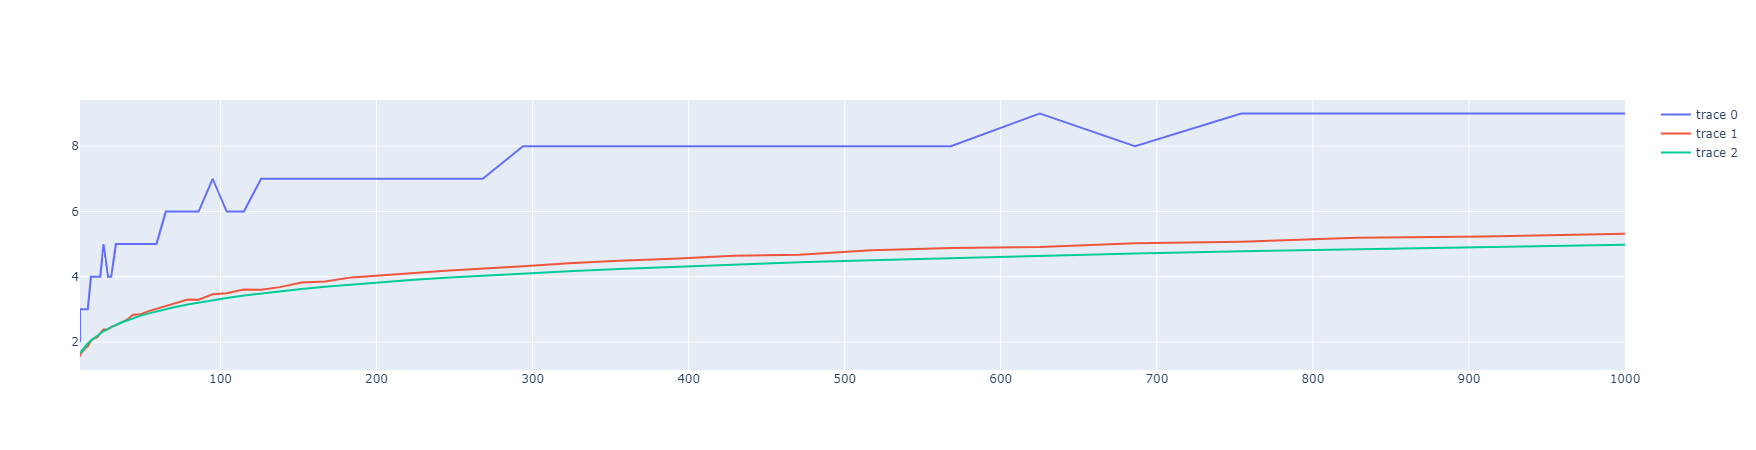

In [106]:
def theor_d_max(x, k):
    return np.log(x) / np.log(k)

theor1 = go.Scatter(
    x=rang,
    y=list(map(lambda x: theor_d_max(x, 4), rang))
)
fig.add_trace(theor1)
fig.show()

In [99]:
list(rang)

[]